<a href="https://colab.research.google.com/github/tamannasadik/Flower_Classification_in_google_Colab/blob/main/Flower_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

train_dir = "/content/drive/MyDrive/Flower_Dataset/train"
val_dir   = "/content/drive/MyDrive/Flower_Dataset/val"


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 3176 images belonging to 13 classes.
Found 799 images belonging to 13 classes.


In [ ]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1001s 10s/step - accuracy: 0.5947 - loss: 1.3084 - val_accuracy: 0.9612 - val_loss: 0.1665
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.9487 - loss: 0.1850 - val_accuracy: 0.9775 - val_loss: 0.1048
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9804 - loss: 0.0876 - val_accuracy: 0.9825 - val_loss: 0.0732
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9818 - loss: 0.0662 - val_accuracy: 0.9800 - val_loss: 0.0556
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9844 - loss: 0.0560 - val_accuracy: 0.9875 - val_loss: 0.0431
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.9887 - loss: 0.0446 - val_accuracy: 0.9837 - val_loss: 0.0539
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9922 - loss: 0.0326 - val_accuracy: 0.9900 - val_loss: 0.0356
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9914 - loss: 0.0334 - val_ac

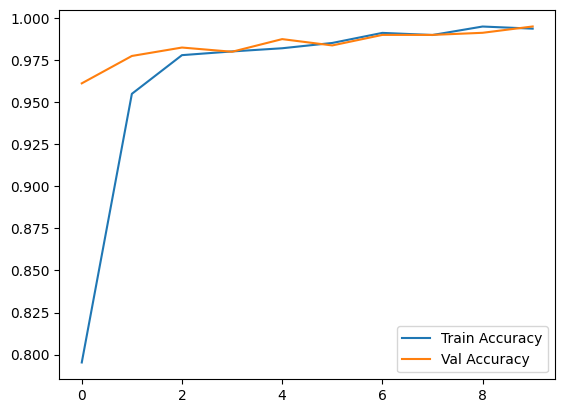

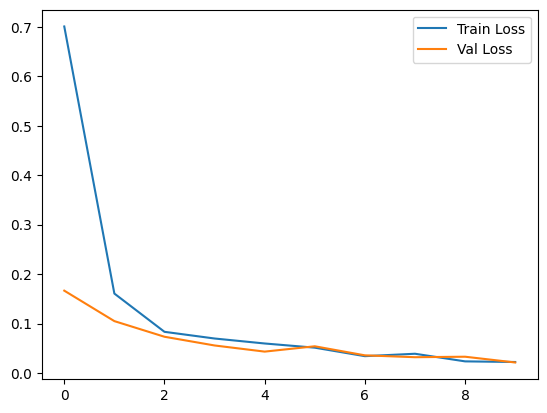

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [10]:
model.save("/content/drive/MyDrive/flower_classification_model.keras")



In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

# কোনো test image এর path দাও
img_path = "/content/drive/MyDrive/Flower_Dataset/val/Golap/IMG_20250113_144410.jpg"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_labels = list(train_data.class_indices.keys())

print("Predicted Class:", class_labels[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: Golap


In [20]:
import os

folder_path = "/content/drive/MyDrive/Flower_Dataset/val/Golap"
print("Files inside:", os.listdir(folder_path)[:20])  # প্রথম 20টা ফাইল দেখাবে



Files inside: ['IMG_20250113_144410.jpg', 'IMG_20250111_164426.jpg', 'IMG_2390.JPG', 'IMG_1321.JPG', 'IMG_20250114_122726.jpg', 'IMG_20250111_173904.jpg', 'IMG_20250114_124421.jpg', 'IMG_1326.JPG', 'IMG_20250113_143756.jpg', 'IMG_20250114_125245.jpg', 'IMG_20250111_163440.jpg', 'IMG_20250114_131407.jpg', 'IMG_20250113_144704.jpg', 'IMG_20250114_122554.jpg', 'IMG_1744.JPG', 'IMG_1737.JPG', 'IMG_1779.JPG', 'IMG_2394.JPG', 'IMG_20250114_122429.jpg', 'IMG_1315.JPG']


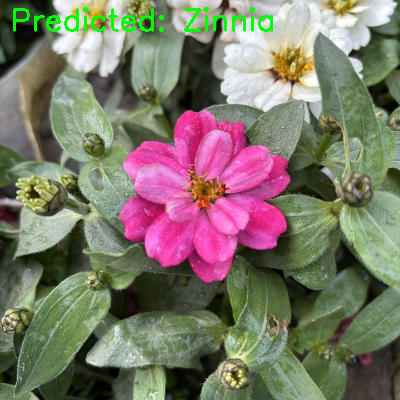

In [26]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Test image path
img_path = "/content/drive/MyDrive/Flower_Dataset/train/Zinnia/IMG_0187.jpg"

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Prediction
prediction = model.predict(img_array, verbose=0)
class_index = np.argmax(prediction)
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[class_index]

# Read original image
orig_img = cv2.imread(img_path)
display_img = cv2.resize(orig_img, (400, 400))

# Add prediction text
cv2.putText(display_img, f"Predicted: {predicted_class}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Show image in Colab
cv2_imshow(display_img)
